In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [18]:
dataset = pd.read_csv('datasets/500_Person_Gender_Height_Weight_Index.csv')
dataset.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [19]:
dataset.drop('Index', inplace=True, axis=1)

In [20]:
dataset.shape

(500, 3)

In [21]:
dataset.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [22]:
min_height = dataset.Height.min()
max_height = dataset.Height.max()

In [23]:
min_height, max_height

(140, 199)

In [24]:
range_of_height = max_height - min_height
range_of_height

59

In [25]:
weight = dataset.Weight
weight.head()

0     96
1     87
2    110
3    104
4     61
Name: Weight, dtype: int64

In [27]:
w_mean = weight.mean()
w_mean

106.0

In [28]:
w_median = weight.median()
w_median

106.0

In [29]:
w_mode = weight.mode()
w_mode

0     50
1     80
2    104
dtype: int64

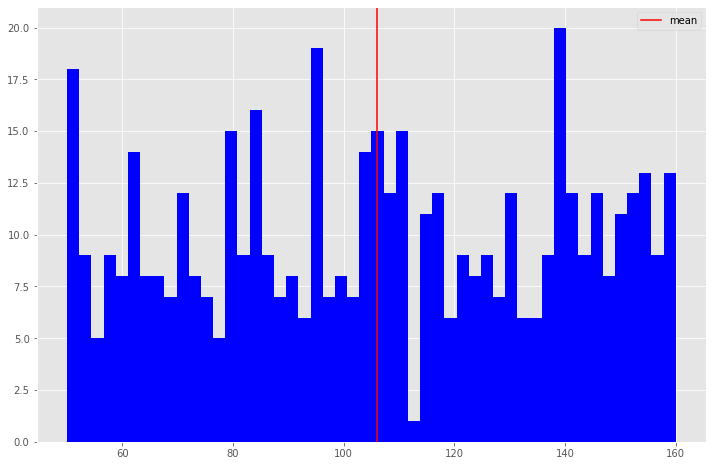

In [30]:
plt.figure(figsize=(12,8))
weight.hist(bins=50, color='b')
plt.axvline(w_mean, color='r', label='mean')
plt.legend()

In [55]:
new_outlier_data = [
    pd.Series({'Gender': 'Male', 'Height': 170, 'Weight': 640}),
    pd.Series({'Gender': 'Female', 'Height': 130, 'Weight': 500}),
    pd.Series({'Gender': 'Male', 'Height': 185, 'Weight': 504}),
    pd.Series({'Gender': 'Male', 'Height': 176, 'Weight': 533}),
    pd.Series({'Gender': 'Male', 'Height': 173, 'Weight': 543}),
    pd.Series({'Gender': 'Male', 'Height': 172, 'Weight': 503}),
    pd.Series({'Gender': 'Male', 'Height': 173, 'Weight': 513}),
    
]
dataset_update = dataset.append(new_outlier_data, ignore_index=True)
dataset_update.tail()

,Gender,Height,Weight
502,Male,185,504
503,Male,176,533
504,Male,173,543
505,Male,172,503
506,Male,173,513


In [56]:
update_mean = dataset_update.Weight.mean()
updated_median = dataset_update.Weight.median()
print("before outlier: (mean, median): ", (w_mean, w_median))
print("after outlier: (mean, median): ", (update_mean, updated_median))

before outlier: (mean, median):  (106.0, 106.0)
after outlier: (mean, median):  (111.90532544378698, 107.0)


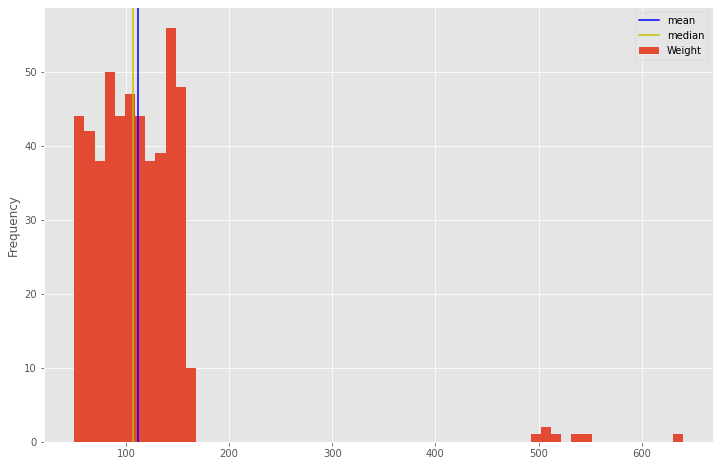

In [61]:
plt.figure(figsize=(12,8))
dataset_update.Weight.plot.hist(bins=60)
plt.axvline(update_mean, color='b', label='mean')
plt.axvline(updated_median, color='y', label='median')
plt.legend()